(Series([], dtype: int64), (622, 40))

In [80]:
import pandas as pd
import numpy as np

#pandasとnumpyライブラリをインポートします。
#CSVファイルからデータを読み込みます。
#数値データの列のみを選択します。
#無限大の値をNaNに置き換えます。
#NaNを含む行を削除します。
#無限大の値が除去されたか確認し、データセットの新しいサイズを表示します。

# Load the data from the CSV file
file_path = 'data.csv'
data = pd.read_csv(file_path, encoding='shift-jis')

# Selecting only numerical columns for standardization
# Since the dataset contains garbled text in some columns, we'll focus on columns with clear numerical data
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Replacing infinite values with NaN and then dropping rows with NaN values
data_cleaned = data.copy()
data_cleaned[numerical_cols] = data_cleaned[numerical_cols].replace([np.inf, -np.inf], np.nan)
data_cleaned = data_cleaned.dropna(subset=numerical_cols)

# Verifying if all infinite values have been removed
inf_values_after = data_cleaned[numerical_cols].isin([np.inf, -np.inf]).sum()

# Displaying the result
inf_values_after[inf_values_after > 0], data_cleaned.shape

data_cleaned.head(10)

,Unnamed: 0,品番,Year,Week_Number,在庫数（箱）,入庫数（箱）,出庫数（箱）,基準在庫日数,基準在庫日数（基準在庫枚数込み）,基準在庫枚数,...,先週からの社内LT増加率,先週からの回収かんばん増加率,使用工程,納入かんばん数,納入数/日量数,入庫数/納入数,出庫数/入庫数,回収数/出庫数,回収数/納入数,便Ave
0,2,019128GA010,2023,36,41.0,87.0,85.0,1.07,1.139097,1.0,...,-0.521146,2.576923,8.ファイナル後半,85.0,0.899090,1.023529,0.977011,1.094118,1.094118,47.270000
1,3,019128GA010,2023,37,40.0,88.0,82.0,1.07,1.139097,1.0,...,0.037037,-0.032258,8.ファイナル後半,92.0,1.038609,0.956522,0.931818,1.097561,0.978261,44.290000
2,4,019128GA010,2023,38,37.0,74.0,78.0,1.07,1.139097,1.0,...,-0.035714,-0.033333,8.ファイナル後半,84.0,0.970874,0.880952,1.054054,1.115385,1.035714,43.260000
3,5,019128GA010,2023,39,40.0,84.0,82.0,1.07,1.139097,1.0,...,0.018519,0.057471,8.ファイナル後半,96.0,1.078167,0.875000,0.976190,1.121951,0.958333,44.520000
4,8,01912ECB010,2023,36,13.0,30.0,28.0,0.85,1.057337,1.0,...,0.038348,2.444444,8.ファイナル後半,31.0,0.983711,0.967742,0.933333,1.107143,1.000000,15.756667
5,9,01912ECB010,2023,37,13.0,28.0,28.0,0.85,1.057337,1.0,...,-0.031250,0.000000,8.ファイナル後半,30.0,1.016719,0.933333,1.000000,1.107143,1.033333,14.753333
6,10,01912ECB010,2023,38,12.0,25.0,26.0,0.85,1.057337,1.0,...,0.076246,-0.064516,8.ファイナル後半,30.0,1.040462,0.833333,1.040000,1.115385,0.966667,14.416667
7,11,01912ECB010,2023,39,14.0,28.0,29.0,0.85,1.057337,1.0,...,-0.062670,0.068966,8.ファイナル後半,31.0,1.044474,0.903226,1.035714,1.068966,1.000000,14.840000
8,14,01912ECB040,2023,36,30.5,85.0,84.0,0.25,0.319097,1.0,...,0.160194,2.444444,8.ファイナル後半,86.0,0.909668,0.988372,0.988235,1.107143,1.081395,94.540000
9,15,01912ECB040,2023,37,26.0,92.0,81.0,0.25,0.319097,1.0,...,-0.364017,-0.021505,8.ファイナル後半,93.0,1.049898,0.989247,0.880435,1.123457,0.978495,88.580000


In [81]:
from sklearn.preprocessing import StandardScaler

#StandardScalerをインポートします
#StandardScalerオブジェクトを作成します
#数値データの列だけを選択します
#選択した列のデータを標準化します
#標準化されたデータの最初の数行を表示します

# Creating a StandardScaler object
scaler = StandardScaler()

# Selecting only numerical columns for standardization
numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Standardizing the numerical columns
data_standardized = data_cleaned.copy()
data_standardized[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])

# Displaying the first few rows of the standardized data
data_standardized.head()

,Unnamed: 0,品番,Year,Week_Number,在庫数（箱）,入庫数（箱）,出庫数（箱）,基準在庫日数,基準在庫日数（基準在庫枚数込み）,基準在庫枚数,...,先週からの社内LT増加率,先週からの回収かんばん増加率,使用工程,納入かんばん数,納入数/日量数,入庫数/納入数,出庫数/入庫数,回収数/出庫数,回収数/納入数,便Ave
0,-1.702635,019128GA010,0.0,-1.321219,1.401549,0.147793,0.131122,2.209243,-0.268424,-0.833971,...,-0.521590,1.613670,8.ファイナル後半,0.112071,-0.278933,0.012724,-0.158796,-0.028505,0.073602,0.211485
1,-1.699066,019128GA010,0.0,-0.434705,1.352185,0.154679,0.110804,2.209243,-0.268424,-0.833971,...,-0.111849,-0.557732,8.ファイナル後半,0.158618,-0.227002,-0.212802,-0.339976,-0.022530,-0.278027,0.164105
2,-1.695497,019128GA010,0.0,0.451809,1.204094,0.058276,0.083712,2.209243,-0.268424,-0.833971,...,-0.165253,-0.558626,8.ファイナル後半,0.105421,-0.252214,-0.467145,0.150068,0.008394,-0.103654,0.147729
3,-1.691928,019128GA010,0.0,1.338323,1.352185,0.127136,0.110804,2.209243,-0.268424,-0.833971,...,-0.125442,-0.483057,8.ファイナル後半,0.185216,-0.212278,-0.487179,-0.162087,0.019787,-0.338508,0.167762
4,-1.681221,01912ECB010,0.0,-1.321219,0.019365,-0.244706,-0.254927,0.875412,-0.279783,-0.833971,...,-0.110886,1.503419,8.ファイナル後半,-0.247009,-0.247436,-0.175039,-0.333902,-0.005906,-0.212048,-0.289553


In [82]:
# 集計したデータを新しいCSVファイルに保存します。
with open('data_cleaned.csv', mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    data_cleaned.to_csv(f)

# 集計したデータを新しいCSVファイルに保存します。
with open('data_standardized.csv', mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    data_standardized.to_csv(f)

In [83]:
import pandas as pd

#必要なライブラリ（ここではpandas）をインポートします。
#CSVファイルからデータを読み込みます。
#テキストベースのカテゴリ変数（object型のデータ）を含む列を選択します。
#選択したカテゴリ変数に対してOne-Hotエンコーディングを適用します。
#エンコーディングされたデータの最初の数行を表示します。

# Load the data from the CSV file
file_path = 'data_cleaned.csv'
#file_path = 'data_standardized.csv'
data = pd.read_csv(file_path,encoding='shift_jis')

# Selecting only object (text-based) columns for one-hot encoding
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols[categorical_cols != '品番']  # Replace 'item_code' with the actual column name

# Applying one-hot encoding to the categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Displaying the first few rows of the encoded data
data_encoded.head()

,Unnamed: 0,Unnamed: 0.1,品番,Year,Week_Number,在庫数（箱）,入庫数（箱）,出庫数（箱）,基準在庫日数,基準在庫日数（基準在庫枚数込み）,...,仕入先名_（株）槌屋,仕入先名_（株）浅賀井製作所,仕入先名_（株）青山製作所,仕入先名_ＮＯＫ（株）,使用工程_1.デフ・大物ギヤ・Brg,使用工程_2.MGケース,使用工程_3.ギヤサブ・共通部品,使用工程_4.TA・カバー・メイン,使用工程_7.ファイナル前半,使用工程_8.ファイナル後半
0,0,2,019128GA010,2023,36,41.0,87.0,85.0,1.07,1.139097,...,0,0,0,0,0,0,0,0,0,1
1,1,3,019128GA010,2023,37,40.0,88.0,82.0,1.07,1.139097,...,0,0,0,0,0,0,0,0,0,1
2,2,4,019128GA010,2023,38,37.0,74.0,78.0,1.07,1.139097,...,0,0,0,0,0,0,0,0,0,1
3,3,5,019128GA010,2023,39,40.0,84.0,82.0,1.07,1.139097,...,0,0,0,0,0,0,0,0,0,1
4,4,8,01912ECB010,2023,36,13.0,30.0,28.0,0.85,1.057337,...,0,0,0,0,0,0,0,0,0,1


In [84]:
# 集計したデータを新しいCSVファイルに保存します。
with open('data3.csv', mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    data_encoded.to_csv(f)

In [193]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error

# データの読み込み
file_path = 'data3.csv'  # 実際のファイルパスに置き換えてください
data = pd.read_csv(file_path, encoding='shift-jis')

# 不要な列（品番）を除外し、目的変数を分離
data = data.drop(columns=['品番'])
data = data.drop(columns=['A'])
data = data.drop(columns=['在庫数（箱）'])
data = data.drop(columns=['入庫数（箱）'])
data = data.drop(columns=['出庫数（箱）'])
data = data.drop(columns=['印刷検収LT'])
data = data.drop(columns=['検収入庫LT'])
data = data.drop(columns=['入庫出庫LT'])
data = data.drop(columns=['出庫回収LT'])
data = data.drop(columns=['回収かんばん数'])
data = data.drop(columns=['納入かんばん数'])
data = data.drop(columns=['日量数（箱数）'])
data = data.drop(columns=['社内LT（検収回収LT）'])
data = data.drop(columns=['社内LT/設計値LT（基準在庫枚数込み）'])
data = data.drop(columns=['回収数/納入数'])
data = data.drop(columns=['基準在庫日数（基準在庫枚数込み）'])
#目的変数削除
data= data.drop(columns=['順立装置在庫量/設計値MIN'])
data= data.drop(columns=['順立装置在庫量/設計値MAX'])
data= data.drop(columns=['先週からの順立装置在庫量増加率'])
data= data.drop(columns=['社内LT/設計値LT'])
#data= data.drop(columns=['先週からの社内LT増加率'])

data = data.rename(columns={'B': '納入回数（便）'})
data = data.rename(columns={'C': '遅れ（便）'})

#y = data['順立装置在庫量/設計値MIN']
# 目的変数を指定
#targets = ['順立装置在庫量/設計値MAX']
#targets = ['順立装置在庫量/設計値MIN']#, '順立装置在庫量/設計値MIN']
#targets = ['先週からの順立装置在庫量増加率']
#targets = ['社内LT/設計値LT']
targets = ['先週からの社内LT増加率']
y = data[targets]
X = data.drop(columns=targets)

#X = data.drop(columns=['順立装置在庫量/設計値MIN'])
#X = data.drop(columns=['順立装置在庫量/設計値MAX'])
# 「コラム1」の位置を見つける
column_index = X.columns.get_loc('Week_Number')
# 「コラム1」より前の列を削除
X = X.iloc[:, column_index+1:]

# 無限大の値をNaNに置き換え、欠損値を平均値で補完
X.replace([np.inf, -np.inf], np.nan, inplace=True)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# 全てのデータを学習データとして使用
#モランダムフォレストの n_estimatorsパラメータ（決定木の数）を減らすことで、モデルが単純化され、処理時間が短縮
#機械学習アルゴリズムにおいて、多くのプロセスはランダムな要素に依存。例えば、データセットをトレーニングセットとテストセットに分割する際や、ランダムフォレストのようなアルゴリズムにおいて、ランダムに特徴やサンプルを選択する際などです。
#random_state パラメータに固定の値（例えば 42）を設定すると、これらのランダムなプロセスが一定の状態で実行され、結果が毎回同じになります。つまり、同じコードを再度実行しても、同じ random_state 値を使えば同じ結果が得られます。
#これにより、結果の再現性が確保されるため、実験の比較、デバッグ、教育目的などに非常に便利です。ただし、実際の運用環境では random_state を固定すると、モデルが新しいデータや未知の状況に対して偏った挙動を示す可能性があるため、注意が必要です。
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_imputed, y)

y_pred = rf_model.predict(X_imputed)
mse = mean_squared_error(y, y_pred)
print(mse)

# 集計したデータを新しいCSVファイルに保存します。
with open('datax.csv', mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    X.to_csv(f)
    
#X.head()
# データフレームのカラムを表示
#print(X.columns,y.columns)#

0.26152057403002016


/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


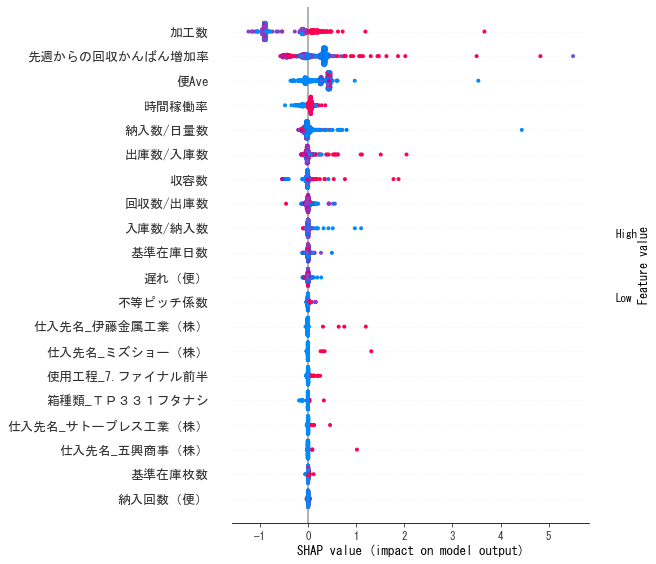

In [194]:
import shap
import matplotlib as mpl

# JavaScriptの初期化、個別いる、保存いらない
#shap.initjs()

# Calculating SHAP values
explainer = shap.TreeExplainer(rf_model, feature_dependence='tree_path_dependent', model_output='margin')
shap_values = explainer.shap_values(X)

#正のSHAP値: 特定の特徴の値がモデルの予測を高める（あるいは、分類問題であれば特定のクラスに属する確率を高める）ことを意味します。たとえば、家の価格を予測するモデルで、家の大きさが大きいほど家の価格が高くなる場合、家の大きさの特徴に対するSHAP値は正になります。
#負のSHAP値: 特定の特徴の値がモデルの予測を減少させることを意味します。同じ家の価格の例で、家が主要道路から遠い場合に価格が低くなるとすれば、この特徴に対するSHAP値は負になります。

#plt.figure(figsize=(64, 40))
#plt.figure(figsize=(32, 20))

# Showing SHAP values
# フォント設定を変更
mpl.rcParams['font.family'] = 'MS Gothic'
# サマリープロットを表示
shap.summary_plot(shap_values, X, feature_names=X.columns, show=False)
# 特徴ごとのSHAP値の平均の絶対値を表示するバープロット
#shap.summary_plot(shap_values, X, feature_names=X.columns, plot_type="bar")
# 最初のデータポイントのSHAP値を表示
#shap.force_plot(explainer.expected_value, shap_values[5], X.iloc[5])
#shap_values[0]

#filename = 'kari_summa.png'
#plt.savefig(filename)

In [195]:
# SHAP値をPandas DataFrameに変換
shap_df = pd.DataFrame(shap_values, columns=X.columns)

# 集計したデータを新しいCSVファイルに保存します。
with open('data_shap.csv', mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    shap_df.to_csv(f)

# DataFrameを表示して確認
shap_df.head(10)

,基準在庫日数,基準在庫枚数,納入回数（便）,遅れ（便）,収容数,不等ピッチ係数,時間稼働率,加工数,先週からの回収かんばん増加率,納入数/日量数,...,仕入先名_（株）槌屋,仕入先名_（株）浅賀井製作所,仕入先名_（株）青山製作所,仕入先名_ＮＯＫ（株）,使用工程_1.デフ・大物ギヤ・Brg,使用工程_2.MGケース,使用工程_3.ギヤサブ・共通部品,使用工程_4.TA・カバー・メイン,使用工程_7.ファイナル前半,使用工程_8.ファイナル後半
0,-0.014780,0.001004,-0.000163,-0.004482,-0.028998,0.035488,0.053175,0.054764,-0.442716,-0.091558,...,-0.006497,-0.000095,3.980378e-05,0.000049,-0.000023,-9.480203e-03,-0.001131,0.003105,-0.000871,0.001458
1,0.003323,-0.000727,0.007482,0.003867,0.006138,0.020134,-0.099231,-0.909408,0.365089,-0.002416,...,-0.000954,-0.000004,-2.022306e-04,0.000103,-0.000852,1.867334e-03,-0.001549,0.000926,-0.002217,0.003970
2,-0.021811,-0.001980,0.002743,-0.002899,-0.018465,0.013873,0.047804,-0.886682,0.374898,0.008756,...,-0.001383,-0.000004,-9.242219e-05,-0.000096,-0.000149,1.919227e-03,-0.001425,0.001444,-0.001564,0.001898
3,-0.003838,-0.001120,0.007119,0.008187,-0.019609,0.033695,0.006857,-0.903787,0.318982,-0.010464,...,-0.000741,0.000727,-5.551834e-04,0.000778,-0.000195,-1.731506e-03,-0.001348,0.002669,-0.001740,0.001771
4,0.018980,0.000613,0.001833,-0.007798,-0.018864,0.053604,0.047472,0.255636,-0.472827,-0.017223,...,-0.005838,-0.000241,8.335280e-05,0.000007,0.000056,-2.257119e-03,-0.001327,0.000859,-0.000866,0.001894
5,0.000500,-0.000832,0.003546,0.004640,0.004262,0.019066,-0.112591,-0.922184,0.305423,-0.001951,...,-0.000906,0.000035,-2.036609e-04,0.000039,0.000354,-8.821335e-04,-0.001294,0.001582,-0.001624,0.004235
6,-0.002533,-0.001346,0.011523,-0.001641,0.002480,0.021059,0.083712,-0.882917,0.330134,0.005009,...,-0.001299,-0.000059,-2.102387e-04,0.000839,0.000134,-6.915560e-07,0.000955,0.001234,-0.000257,0.001915
7,0.002159,-0.001317,0.012528,0.000995,-0.006149,0.030518,0.005051,-0.910426,0.294864,-0.012098,...,-0.000739,0.000451,-5.513063e-04,0.000845,0.000031,6.475737e-05,-0.001238,0.002996,-0.002283,0.001751
8,0.018628,0.001800,0.005546,0.002380,-0.005187,0.004320,0.045876,0.176867,-0.523273,-0.008181,...,-0.005956,-0.000217,-8.626746e-07,-0.000068,0.000049,-3.876453e-03,-0.001320,0.001241,-0.000284,0.001798
9,0.004305,-0.004539,-0.006272,-0.013232,-0.002843,-0.005660,-0.100468,-0.907535,0.340337,-0.025273,...,-0.000902,-0.000043,-1.539482e-04,-0.000461,-0.001329,2.376169e-03,-0.001572,0.001446,-0.001462,0.006834


In [196]:
# データの読み込み
file_path = 'data3.csv'  # 実際のファイルパスに置き換えてください
data = pd.read_csv(file_path, encoding='shift-jis')

# 品番列を含むデータフレームの読み込み
df_product = data[['品番']]
#df_product.head()

# 元のデータフレームの読み込み
df_main = pd.read_csv('data_shap.csv', encoding='shift-jis')

# 両方のデータフレームの行数が同じであることを確認
if len(df_main) == len(df_product):
    # データフレームの横結合
    df_combined = pd.concat([df_main, df_product], axis=1)
else:
    print("Error: データフレームの行数が異なります。")
    
# 集計したデータを新しいCSVファイルに保存します。
with open('data_result.csv', mode='w',newline='', encoding='shift_jis',errors='ignore') as f:
    df_combined.to_csv(f)

# 結果の確認
df_combined.head()

,Unnamed: 0,基準在庫日数,基準在庫枚数,納入回数（便）,遅れ（便）,収容数,不等ピッチ係数,時間稼働率,加工数,先週からの回収かんばん増加率,...,仕入先名_（株）浅賀井製作所,仕入先名_（株）青山製作所,仕入先名_ＮＯＫ（株）,使用工程_1.デフ・大物ギヤ・Brg,使用工程_2.MGケース,使用工程_3.ギヤサブ・共通部品,使用工程_4.TA・カバー・メイン,使用工程_7.ファイナル前半,使用工程_8.ファイナル後半,品番
0,0,-0.014780,0.001004,-0.000163,-0.004482,-0.028998,0.035488,0.053175,0.054764,-0.442716,...,-0.000095,0.000040,0.000049,-0.000023,-0.009480,-0.001131,0.003105,-0.000871,0.001458,019128GA010
1,1,0.003323,-0.000727,0.007482,0.003867,0.006138,0.020134,-0.099231,-0.909408,0.365089,...,-0.000004,-0.000202,0.000103,-0.000852,0.001867,-0.001549,0.000926,-0.002217,0.003970,019128GA010
2,2,-0.021811,-0.001980,0.002743,-0.002899,-0.018465,0.013873,0.047804,-0.886682,0.374898,...,-0.000004,-0.000092,-0.000096,-0.000149,0.001919,-0.001425,0.001444,-0.001564,0.001898,019128GA010
3,3,-0.003838,-0.001120,0.007119,0.008187,-0.019609,0.033695,0.006857,-0.903787,0.318982,...,0.000727,-0.000555,0.000778,-0.000195,-0.001732,-0.001348,0.002669,-0.001740,0.001771,019128GA010
4,4,0.018980,0.000613,0.001833,-0.007798,-0.018864,0.053604,0.047472,0.255636,-0.472827,...,-0.000241,0.000083,0.000007,0.000056,-0.002257,-0.001327,0.000859,-0.000866,0.001894,01912ECB010


In [197]:
import pandas as pd

# ファイルの読み込み
file_path = 'data_result.csv'  # 実際のファイルパスに置き換えてください
df = pd.read_csv(file_path, encoding='shift-jis')

# 品番ごとに集計する処理
# ここでは例として平均値を計算しますが、必要に応じて集計方法を変更してください
df_grouped = df.groupby('品番').mean()

# 新しいデータフレームを作成
new_df = df_grouped.reset_index()
# 複数の 'Unnamed' 列を削除
new_df = new_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

# 新しいデータフレームを確認
new_df.head()
#print(len(new_df))

,品番,基準在庫日数,基準在庫枚数,納入回数（便）,遅れ（便）,収容数,不等ピッチ係数,時間稼働率,加工数,先週からの回収かんばん増加率,...,仕入先名_（株）槌屋,仕入先名_（株）浅賀井製作所,仕入先名_（株）青山製作所,仕入先名_ＮＯＫ（株）,使用工程_1.デフ・大物ギヤ・Brg,使用工程_2.MGケース,使用工程_3.ギヤサブ・共通部品,使用工程_4.TA・カバー・メイン,使用工程_7.ファイナル前半,使用工程_8.ファイナル後半
0,019128GA010,-0.009276,-0.000706,0.004295,0.001168,-0.015234,0.025798,0.002151,-0.661278,0.154063,...,-0.002394,0.000156,-0.000203,0.000208,-0.000305,-0.001856,-0.001363,0.002036,-0.001598,0.002274
1,01912ECB010,0.004776,-0.000721,0.007358,-0.000951,-0.004568,0.031062,0.005911,-0.614973,0.114399,...,-0.002196,0.000047,-0.000220,0.000433,0.000144,-0.000769,-0.000726,0.001668,-0.001258,0.002449
2,01912ECB040,0.012954,-0.001363,-0.002794,-0.005207,-0.005835,-0.000761,0.005811,-0.623862,0.138194,...,-0.002198,-0.000078,-0.000249,0.000199,-0.000403,-0.001929,-0.001487,0.001243,-0.000842,0.003178
3,01912ECB060,-0.015061,0.008278,-0.001972,-0.010549,0.001848,-0.005438,0.006769,-0.475822,0.110673,...,-0.002056,-0.000071,0.000907,-0.000221,0.000072,-0.000659,-0.001548,0.002093,-0.002376,0.002249
4,1040043104R,-0.012397,0.004003,0.006594,-0.004795,-0.004534,0.027395,0.014118,-0.202277,-0.051014,...,-0.002011,-0.000073,-0.000464,0.000092,0.000892,-0.001670,-0.001335,0.001393,-0.005264,-0.000723


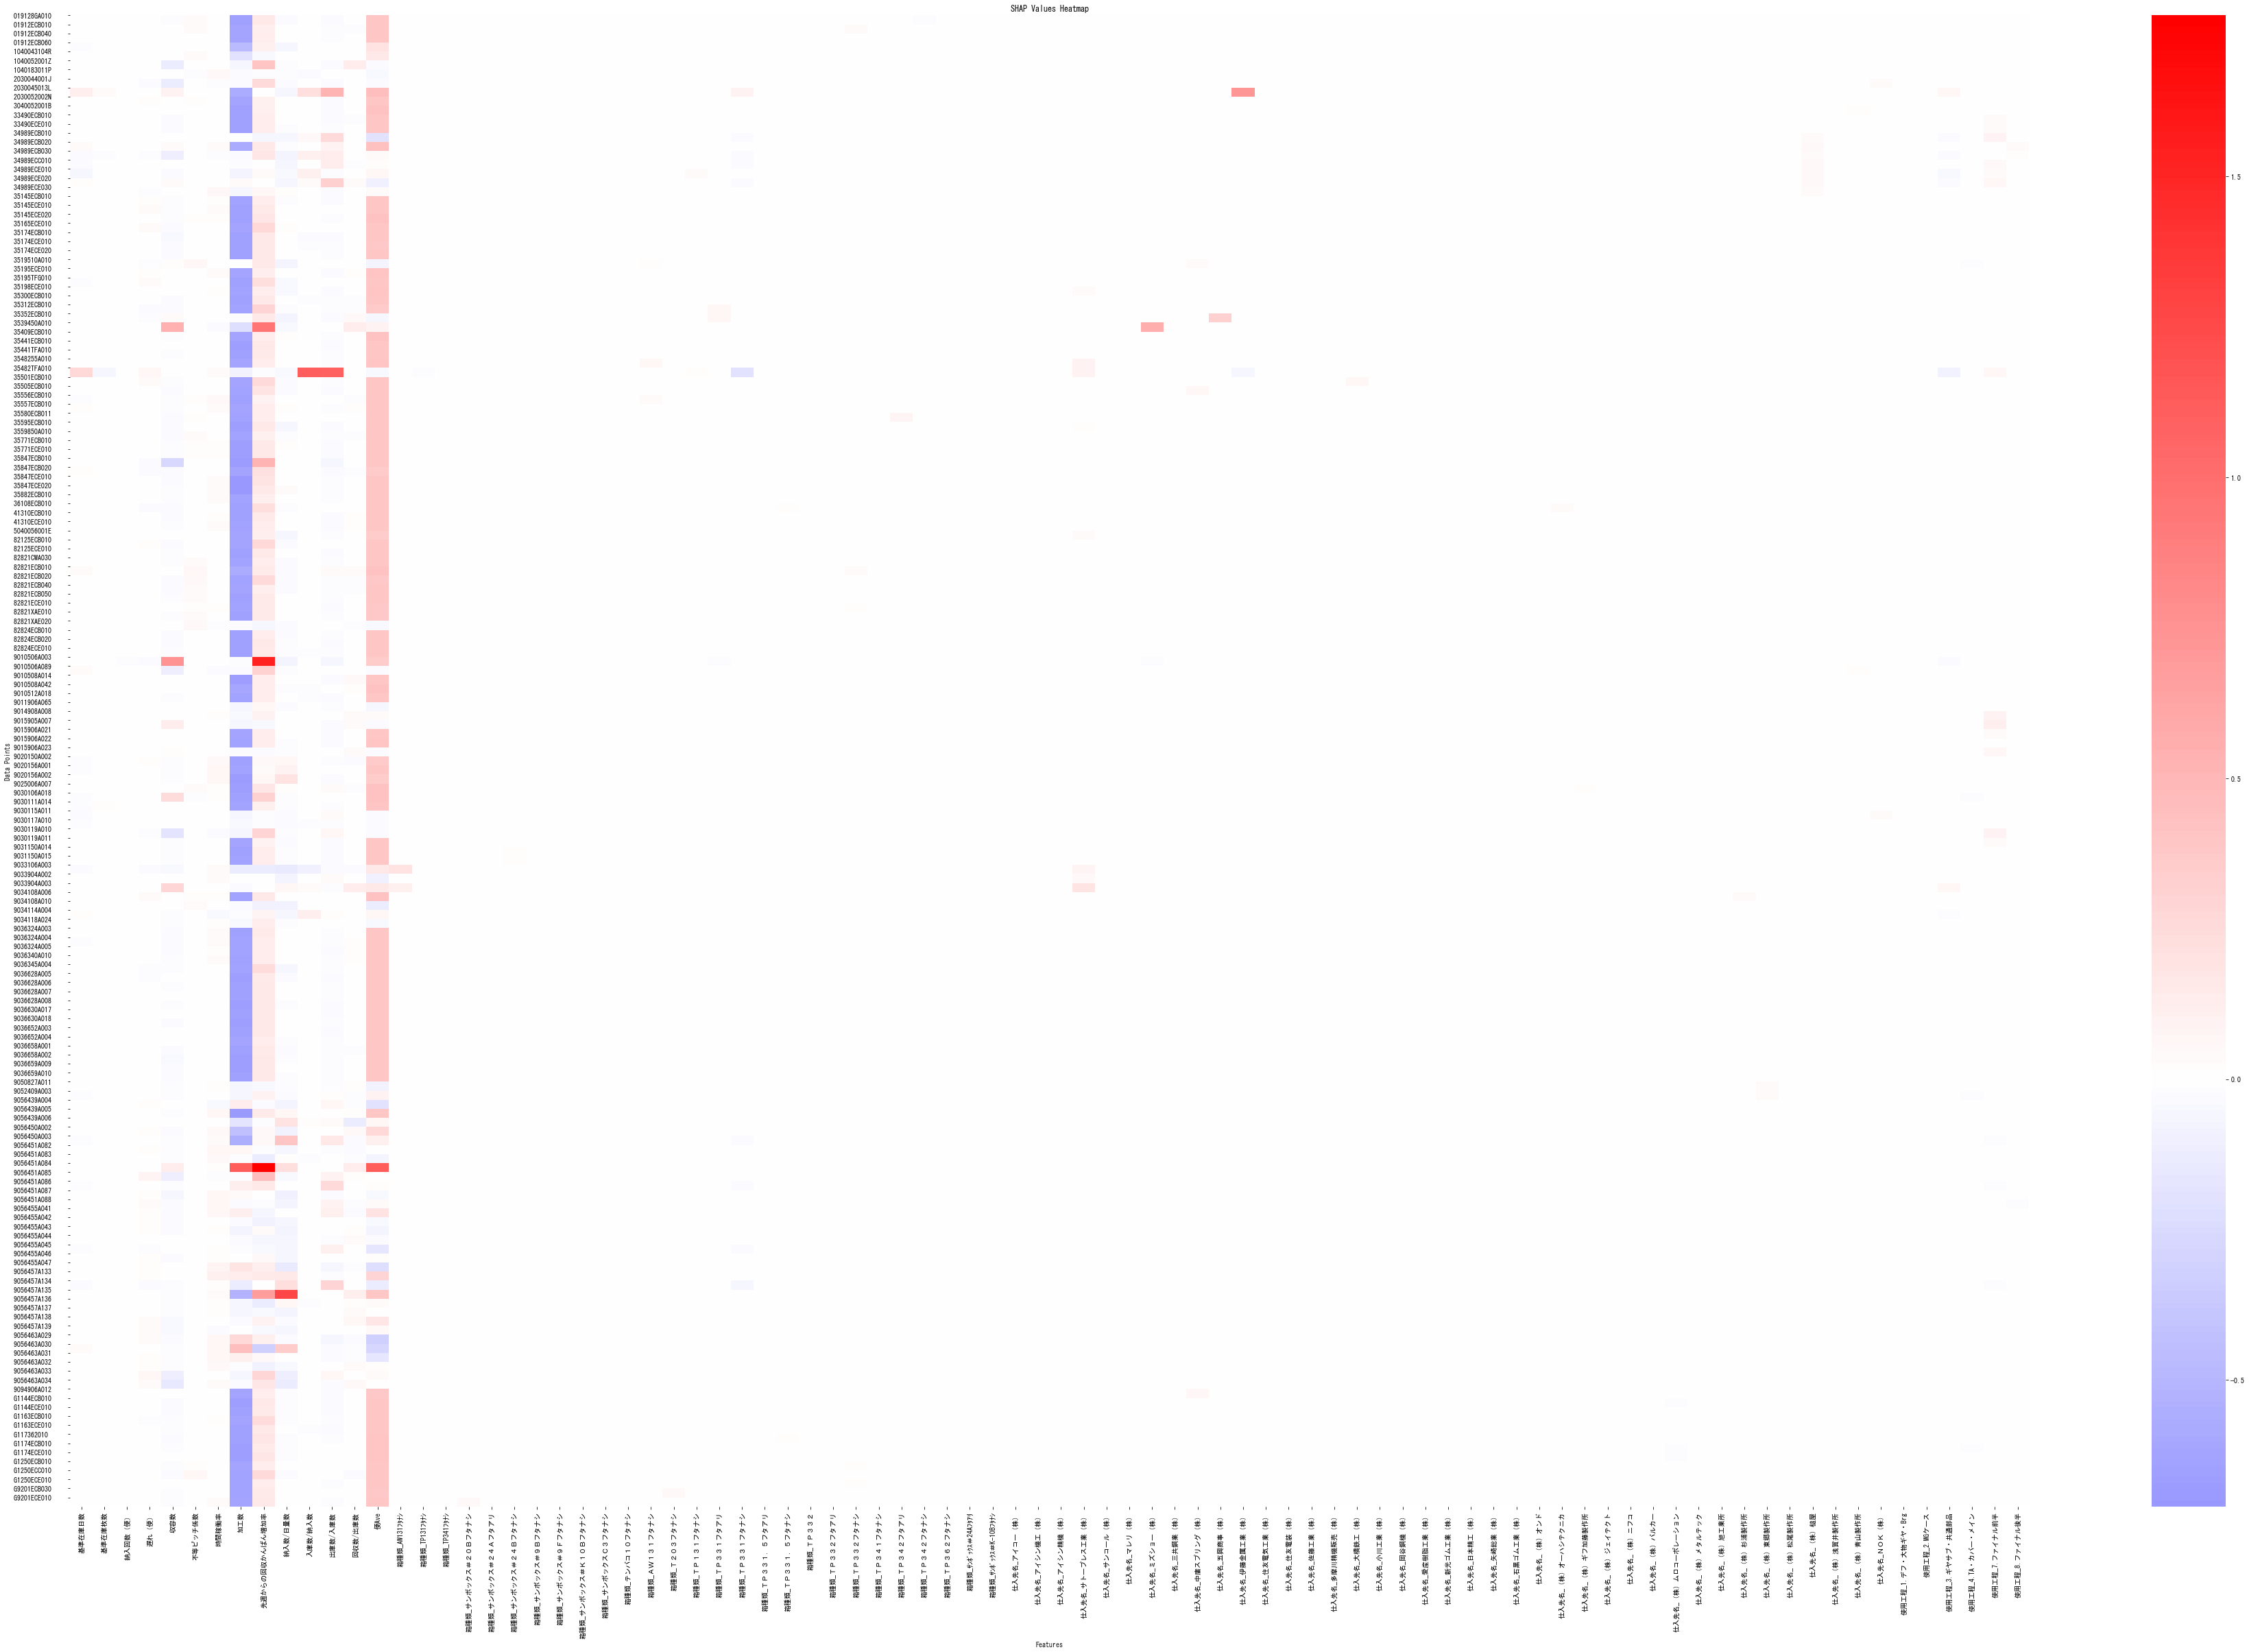

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

# SHAP値のヒートマップをプロット
plt.figure(figsize=(64, 40))

data_points_labels = new_df['品番'].tolist()   # dfはラベルを含むDataFrame

new_df = new_df.drop('品番', axis=1)
sns.heatmap(new_df, cmap='bwr', annot=False, center=0)

# タイトルとラベルの追加
plt.title('SHAP Values Heatmap')
plt.xlabel('Features')
plt.ylabel('Data Points')

# 横軸（特徴）のラベルを設定
#plt.xticks(np.arange(len(shap_df.columns)) + 0.5, shap_df.columns, rotation=45, ha='right')

# 縦軸のラベルを設定（例として、'data_points_labels' 列を使用）
#data_points_labels = new_df[['品番']]  # dfはラベルを含むDataFrame
plt.yticks(np.arange(len(data_points_labels)), data_points_labels)

filename = 'kari_SHAP.png'
plt.savefig(filename)

# プロットの表示
plt.show()

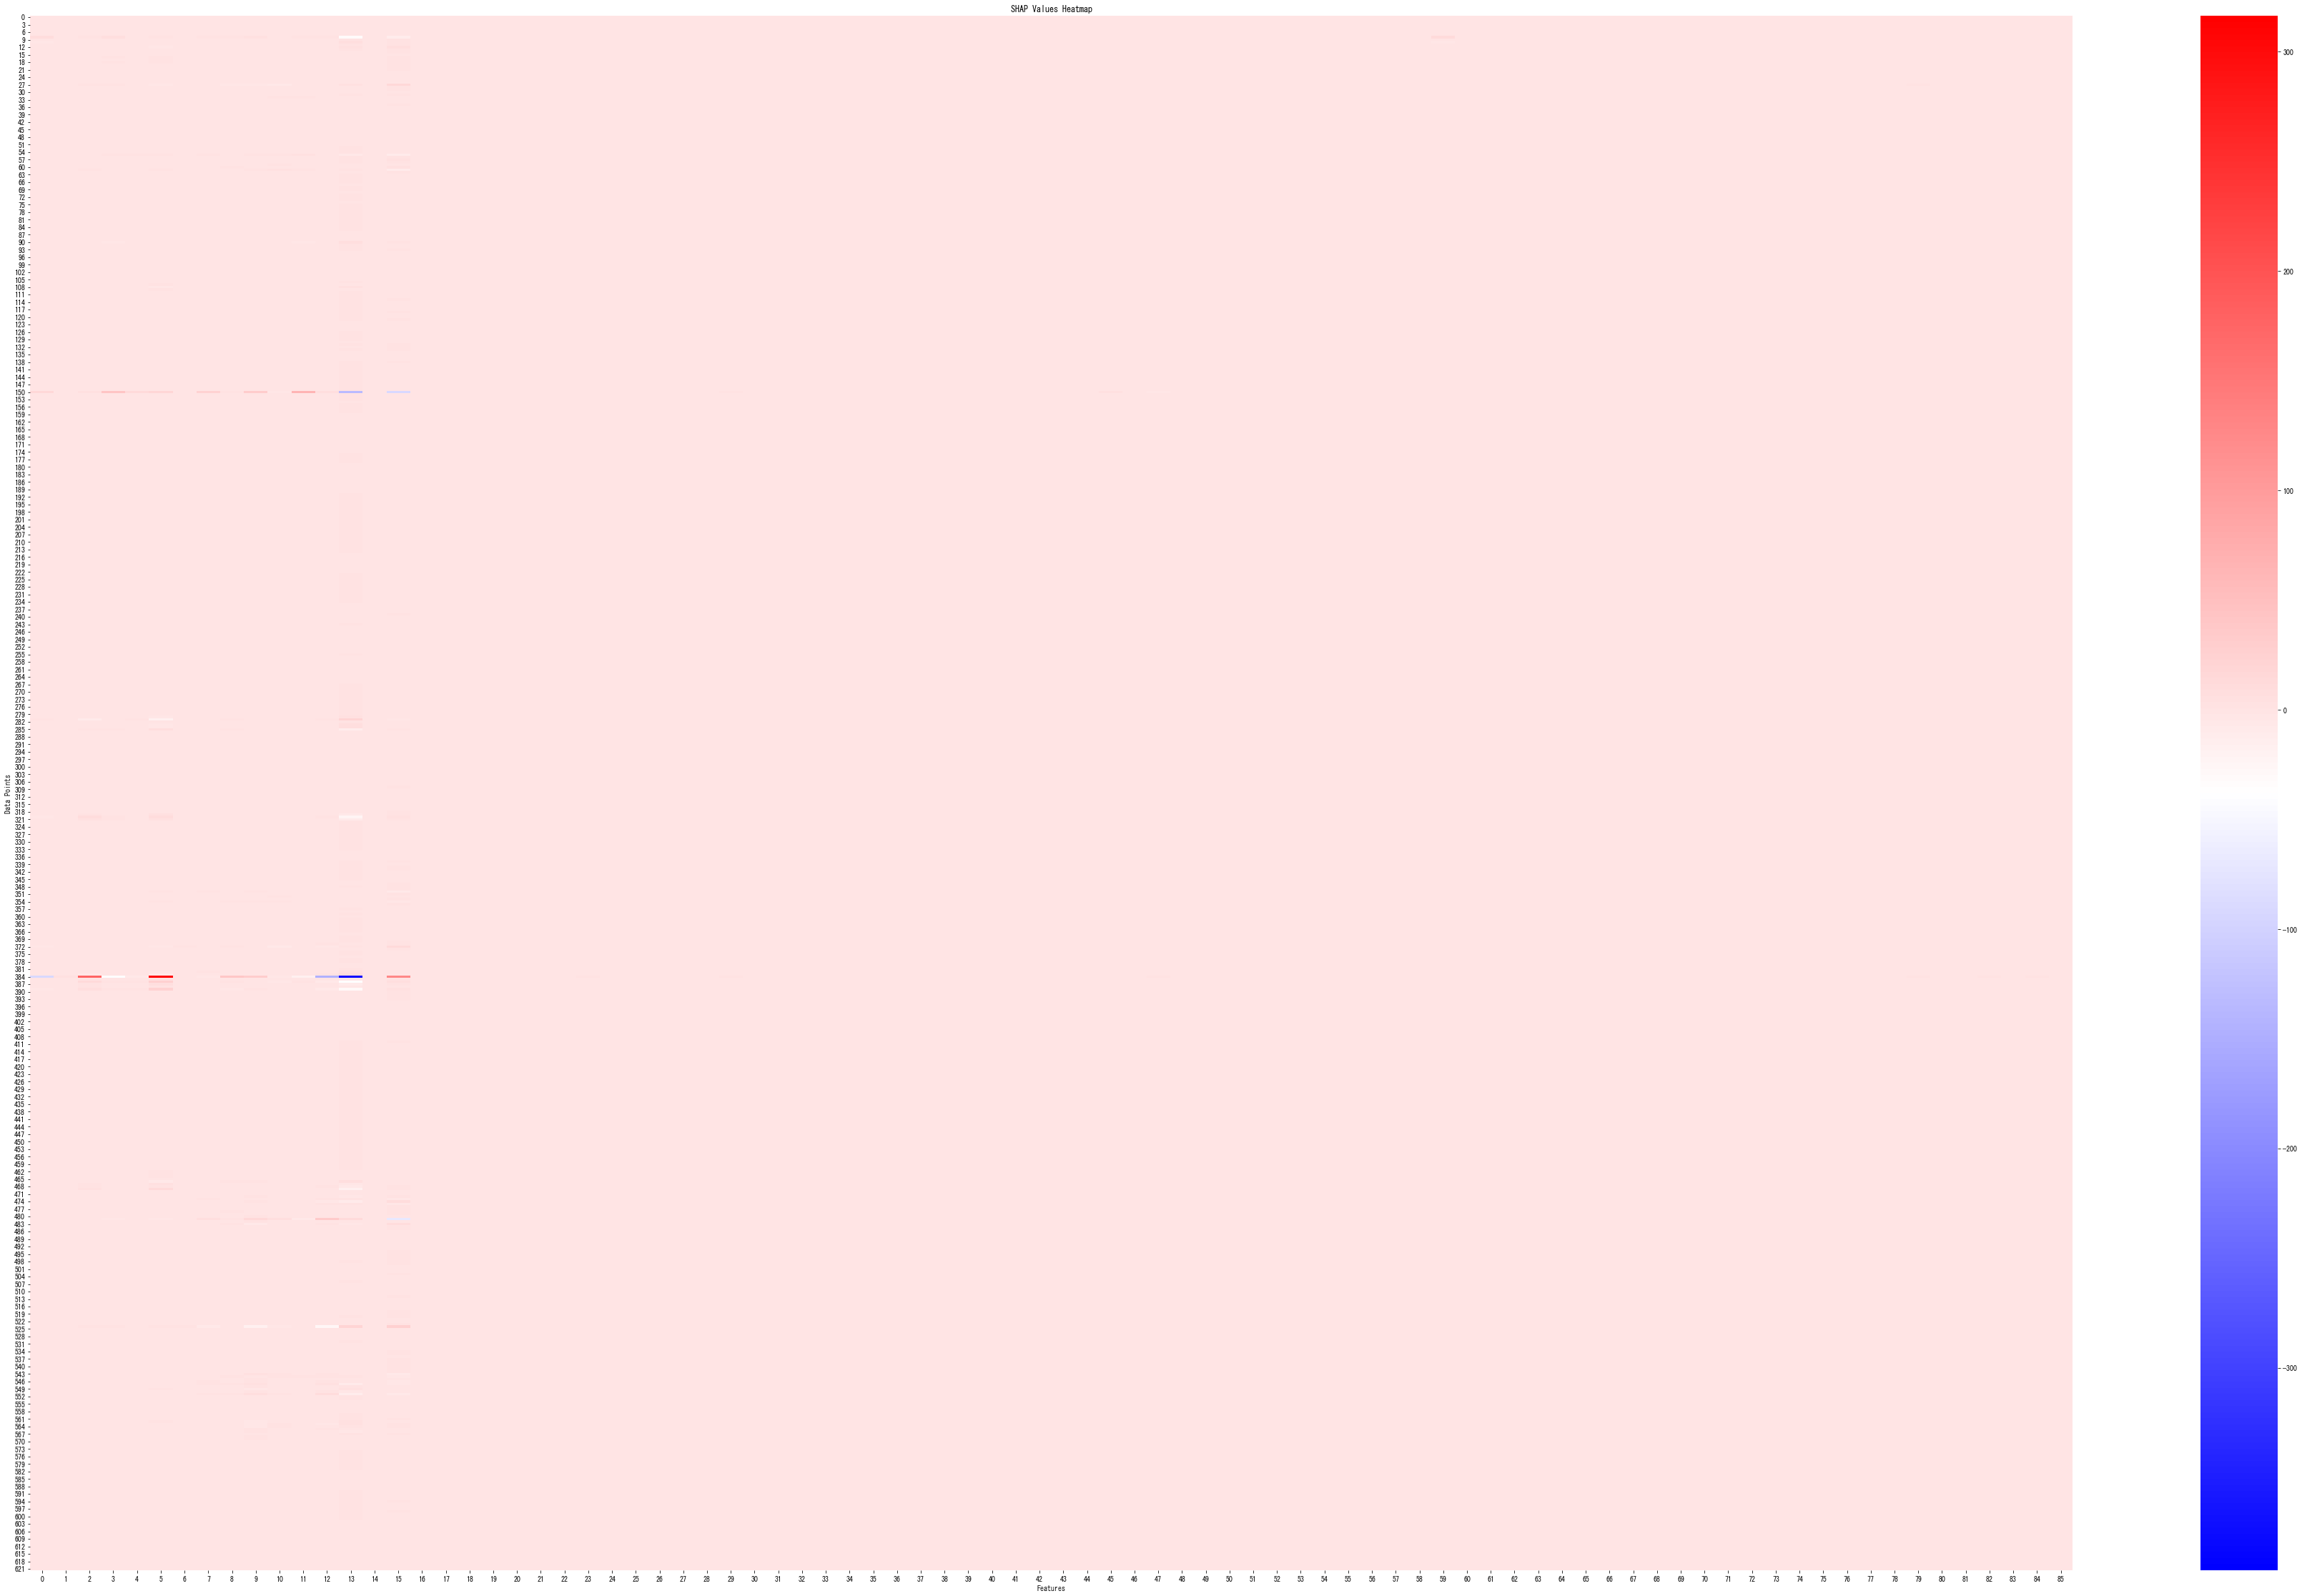

In [147]:
import numpy as np
import shap

# モデルの予測結果を計算
model_predictions = rf_model.predict(X)

# モデルの予測結果の平均値を計算
mean_prediction = np.mean(model_predictions)

# SHAP値の計算
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X)

# 各データポイントのモデル予測と平均予測の差を計算
differences = model_predictions - mean_prediction

# 各データポイントのSHAP値を差で割る
normalized_shap_values = shap_values / differences[:, None]

# SHAP値のヒートマップをプロット
plt.figure(figsize=(64, 40))

#data_points_labels = new_df['品番'].tolist()   # dfはラベルを含むDataFrame

#new_df = new_df.drop('品番', axis=1)
sns.heatmap(normalized_shap_values, cmap='bwr', annot=False)#, center=0)

# タイトルとラベルの追加
plt.title('SHAP Values Heatmap')
plt.xlabel('Features')
plt.ylabel('Data Points')

# 横軸（特徴）のラベルを設定
#plt.xticks(np.arange(len(shap_df.columns)) + 0.5, shap_df.columns, rotation=45, ha='right')

# 縦軸のラベルを設定（例として、'data_points_labels' 列を使用）
#data_points_labels = new_df[['品番']]  # dfはラベルを含むDataFrame
#plt.yticks(np.arange(len(data_points_labels)), data_points_labels)

filename = 'kari_SHAP.png'
plt.savefig(filename)

# プロットの表示
plt.show()

In [ ]:
# ランダムフォレストから一つの決定木を選択
tree = rf_model.estimators_[0]

# 決定木の可視化
dot_data = export_graphviz(tree, out_file=None, feature_names=X_encoded.columns, 
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # グラフをファイルに出力

In [38]:
# 特徴量重要度の取得
feature_importances = rf_model.feature_importances_

# 特徴量重要度をデータフレームに整形
feature_names = onehot_encoder.get_feature_names(input_features=X.columns)
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 特徴量重要度の表示
#各特徴量の重要度を計算します。計算された特徴量重要度はデータフレーム形式で表示され、重要度が高い特徴から順に並べられます。
print(importances_df)

                                      Feature  Importance
2076                                    B_1.0    0.178448
4488                              不等ピッチ係数_0.0    0.123218
2077                                    B_2.0    0.057884
4499                             不等ピッチ係数_0.29    0.031483
2145                                収容数_500.0    0.029488
...                                       ...         ...
3631   社内LT/設計値LT（基準在庫枚数込み）_2.393504976417606    0.000000
3630    社内LT/設計値LT（基準在庫枚数込み）_2.39041530519074    0.000000
3629  社内LT/設計値LT（基準在庫枚数込み）_2.3860259032038176    0.000000
3627    社内LT/設計値LT（基準在庫枚数込み）_2.36700474120632    0.000000
0                                Unnamed: 0_0    0.000000

[7197 rows x 2 columns]


In [16]:
import matplotlib.pyplot as plt
# 特徴量重要度の取得
feature_importances = rf_model.feature_importances_
# 特徴量名の取得
feature_names = onehot_encoder.get_feature_names(input_features=X.columns)
# 特徴量重要度の降順でソート
indices = np.argsort(feature_importances)[::-1]
# 特徴量重要度のプロット
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

KeyboardInterrupt: 

In [48]:
conda install -c conda-forge shap

done
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
WARNING conda.models.version:get_matcher(545): Using .* with relational operator is superfluous and deprecated and will be removed in a future version of conda. Your spec was 1.9.0.*, but conda is ignoring the .* and treating it as 1.9.0
WARNING conda.models.version:get_matcher(545): Using .* with relational operator is superfluous and deprecated and will be removed in a future version of conda. Your spec was 1.6.0.*, but conda is ignoring the .* and treating it as 1.6.0
done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /anaconda/anaconda3

  added / updated specs:
    - shap


The 

In [11]:
conda install python-graphviz

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /anaconda/anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.08.22 |       hecd8cb5_0         124 KB
    certifi-2022.12.7          |   py37hecd8cb5_0         151 KB
    conda-22.9.0               |   py37hecd8cb5_0         877 KB
    fribidi-1.0.10             |       haf1e3a3_0          63 KB
    graphite2-1.3.13           |       h2098e52_0          80 KB
    graphviz-2.40.1            |       hefbbd9a_2         6.3 MB
    openssl-1.1.1w             |       hca72f7f_0         2.8 MB
    pango-1.42.4               |       h060686c_0         455 KB
  

In [130]:
conda update shap

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /anaconda/anaconda3

  added / updated specs:
    - shap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB
    anaconda-project-0.11.1    |   py37hecd8cb5_0         488 KB
    appnope-0.1.2              |py37hecd8cb5_1001          10 KB
    appscript-1.1.2            |   py37h9ed2024_0         130 KB
    asn1crypto-1.5.1           |   py37hecd8cb5_0         167 KB
    astroid-2.14.2             |   py37hecd8cb5_0         402 KB
    atomicwrites-1.4.0         |             py_0          11 KB
    attrs-22.1.0               |   py37hecd8cb5_0          84 KB
    babel-2.11.0      

In [ ]:
sHAP値の解釈について以下の点を考慮してください：

寄与度の大きさと方向:

SHAP値が正の場合、その特徴は予測値を増加させる方向に影響を与えます。
SHAP値が負の場合、その特徴は予測値を減少させる方向に影響を与えます。
SHAP値が大きいほど、その特徴は予測に大きな影響を与えます。
特徴の重要性:

SHAP値の絶対値が大きい特徴は、モデルの予測にとって重要であると考えられます。
SHAP要約プロットでは、これらの特徴が上部に表示され、それぞれの特徴が予測に与える影響の大きさが可視化されます。
特徴の影響の分布:

SHAP要約プロットでは、各特徴のSHAP値がデータポイントごとにプロットされます。
プロットの幅が広い特徴は、異なるデータポイントで影響の度合いが大きく変わることを示しています（高い変動性）。
特徴の相互作用:

SHAP値は特徴間の相互作用も考慮に入れます。つまり、ある特徴の影響は他の特徴の値に依存することがあります。
SHAP依存性プロットを使用すると、特定の特徴とターゲット変数との関係、および他の特徴との相互作用を確認できます。
SHAP値を使用することで、モデルがどのようにして特定の予測に至ったか、どの特徴が予測に最も影響を与えたかを理解することができます。これにより、モデルの解釈性が向上し、より透明で信頼性の高い予測結果を得ることができます。







In [49]:
X.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Year,Week_Number,基準在庫日数,基準在庫日数（基準在庫枚数込み）,基準在庫枚数,A,B,...,仕入先名_（株）槌屋,仕入先名_（株）浅賀井製作所,仕入先名_（株）青山製作所,仕入先名_ＮＯＫ（株）,使用工程_1.デフ・大物ギヤ・Brg,使用工程_2.MGケース,使用工程_3.ギヤサブ・共通部品,使用工程_4.TA・カバー・メイン,使用工程_7.ファイナル前半,使用工程_8.ファイナル後半
0,0,0,2,2023,36,1.07,1.139097,1.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,3,2023,37,1.07,1.139097,1.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,1
2,2,2,4,2023,38,1.07,1.139097,1.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,1
3,3,3,5,2023,39,1.07,1.139097,1.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,1
4,4,4,8,2023,36,0.85,1.057337,1.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,1
